# Assess prediction

## Dimensions to consider

- year
- season
- hourly

- daily count vs hourly count

## Variable to consider

- weather


In [2]:
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = xr.open_dataset("/Users/rafnuss/Library/CloudStorage/Box-Box/defile-migration-forecast/logs/eval/runs/2024-07-10_13-46-54/test_pred.nc")

## Global metric


In [4]:
true_count = data["count"].values.flatten()
pred_count = data["count_pred"].values.flatten()

# Filter
# np.unique(data["date"].dt.year)
year = 2014
true_count
pred_count

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

Non-zero true count: 0.3946220930232558
Non-zero predicted count: 0.625


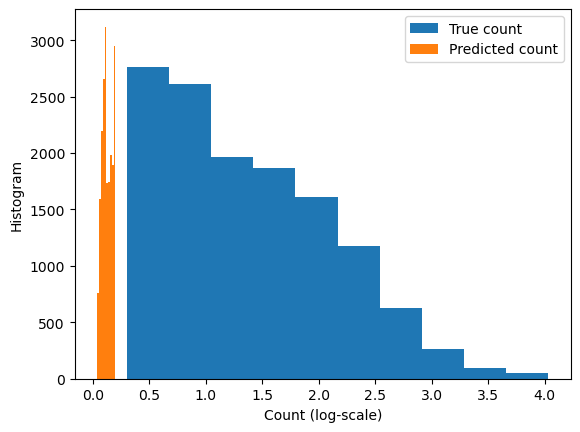

In [7]:
print("Non-zero true count: " + str((true_count!=0).mean()))
print("Non-zero predicted count: " + str((pred_count!=0).mean()))

true_count_n0 = true_count[true_count!=0]
pred_count_n0 = pred_count[pred_count!=0]
plt.hist(true_count_n0, label='True count')
plt.hist(pred_count_n0, label='Predicted count')
plt.xlabel("Count (log-scale)")
plt.ylabel("Histogram")
plt.legend()
plt.show()

/var/folders/cm/dh8lmmxn3b5bcb2_gbz16ycm0000gn/T/ipykernel_48465/3569015681.py:2: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(true_count, pred_count, 5)


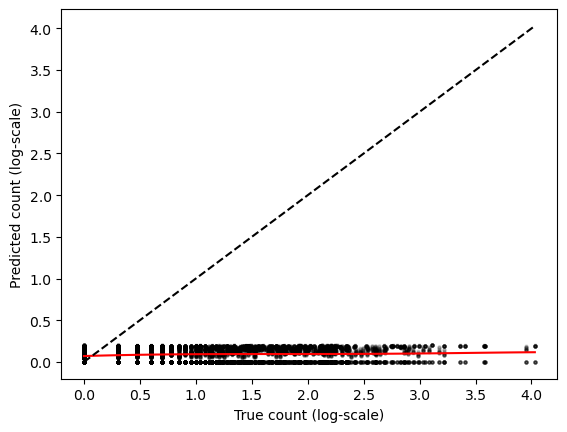

In [8]:
x = np.linspace(min(true_count), max(true_count), 100)
coef = np.polyfit(true_count, pred_count, 5)
y = np.polyval(coef, x)

plt.scatter(true_count, pred_count, c ="black", s = 5, alpha=0.1 )
plt.plot(x, y, c="red")
plt.plot(x, x, '--', c="black")
plt.xlabel("True count (log-scale)")
plt.ylabel("Predicted count (log-scale)")
plt.show()

## Timeseries


In [9]:
year = 2014
data["mask"].values.shape

(1376, 24)

In [10]:
data.sel(date=data.date.dt.year==year)

<xarray.Dataset>
Dimensions:                  (date: 1015, time: 24)
Coordinates:
  * date                     (date) datetime64[ns] 2014-10-05 ... 2014-11-24
  * time                     (time) object '0 nanoseconds' ... '8280000000000...
Data variables:
    temperature_2m           (date, time) float64 ...
    total_precipitation      (date, time) float64 ...
    surface_pressure         (date, time) float64 ...
    u_component_of_wind_10m  (date, time) float64 ...
    v_component_of_wind_10m  (date, time) float64 ...
    count_pred               (date, time) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    count                    (date, time) float32 1.886 1.886 1.886 ... 0.0 0.0
    mask                     (date, time) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [11]:
data.sel(date=data.date.dt.year==year).groupby("date.dayofyear").mean()

<xarray.Dataset>
Dimensions:                  (dayofyear: 133, time: 24)
Coordinates:
  * time                     (time) object '0 nanoseconds' ... '8280000000000...
  * dayofyear                (dayofyear) int64 196 197 198 199 ... 342 343 344
Data variables:
    temperature_2m           (dayofyear, time) float64 0.4804 0.4755 ... -0.9271
    total_precipitation      (dayofyear, time) float64 1.032 -0.4653 ... 0.012
    surface_pressure         (dayofyear, time) float64 0.7391 0.7196 ... 0.8537
    u_component_of_wind_10m  (dayofyear, time) float64 0.5234 0.2825 ... 0.4167
    v_component_of_wind_10m  (dayofyear, time) float64 -0.5937 ... 0.6579
    count_pred               (dayofyear, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    count                    (dayofyear, time) float32 0.0 0.0 ... 0.1193 0.1193
    mask                     (dayofyear, time) float32 0.0 0.0 0.0 ... 0.0 0.0

In [29]:
10**data["count"].values

array([[1.6410002e+03, 1.6410002e+03, 1.6410002e+03, ..., 1.6410002e+03,
        1.6410002e+03, 1.6410002e+03],
       [9.6699988e+02, 9.6699988e+02, 9.6699988e+02, ..., 9.6699988e+02,
        9.6699988e+02, 9.6699988e+02],
       [7.6999992e+01, 7.6999992e+01, 7.6999992e+01, ..., 7.6999992e+01,
        7.6999992e+01, 7.6999992e+01],
       ...,
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
plt.scatter(test_count_true.squeeze(), np.sum(test_count_pred.squeeze() * test_mask, 1))
plt.plot([0, 3], [0, 3], c="tab:grey", linestyle=":")
plt.xlabel("Observed counts")
plt.ylabel("Predicted masked counts")

In [ ]:
plt.plot(predictions.time, predictions.count)

NameError: name 'predictions' is not defined

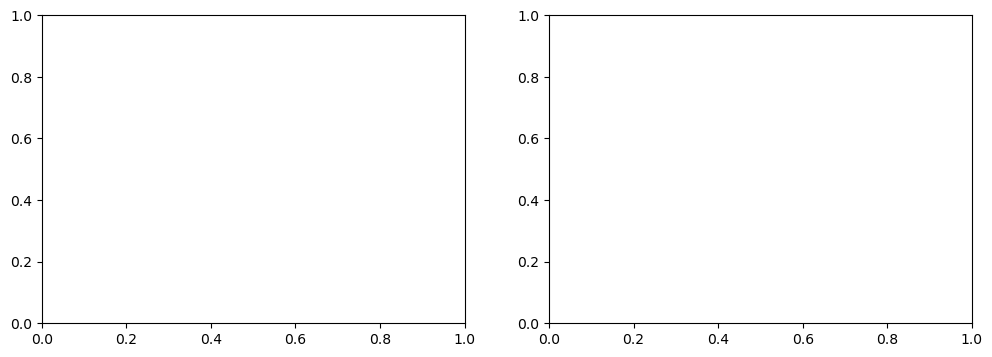

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

print(np.unique(predictions.date.dt.year))
predictions.sel(date=predictions.date.dt.year == 2014).sum(dim="time").count_pred.plot(ax=ax[0])
ax[0].set_title("Sum of predicted counts by date")

ax[1].plot(predictions.mean(dim="date").count_pred)
ax[1].set_title("Mean of predicted counts by time")